In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orig = pd.read_csv('customerchurn.csv')
df = df_orig.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# total charges should be float64.. check what is causing the object data type
print([x for x in df['TotalCharges'] if any(char.isdigit() for char in x) == False])

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [6]:
# replace blanks with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

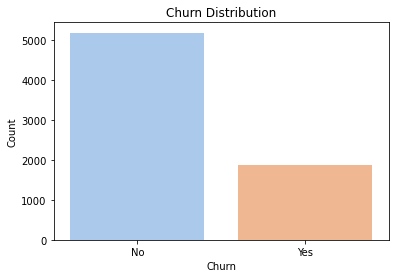

In [7]:
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()

## Numerical Features

In [8]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
df[num_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
df[num_features + ['Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


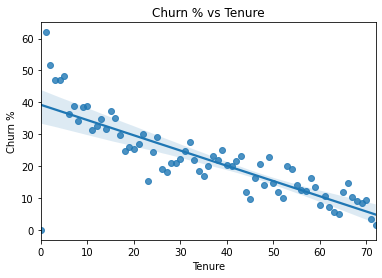

In [11]:
ct = pd.crosstab(df['tenure'], df['Churn'])
ct['Churn %'] = round(100*ct['Yes']/(ct['No']+ct['Yes']), 2)

sns.regplot(x='tenure', y='Churn %', data=ct.reset_index())
plt.title('Churn % vs Tenure')
plt.xlabel('Tenure')
plt.show()

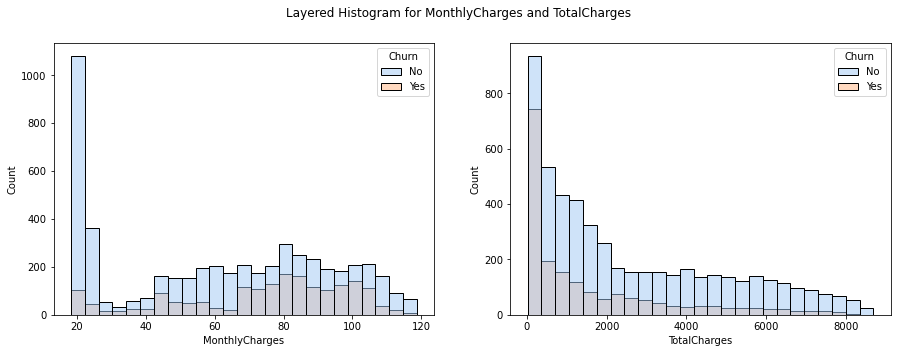

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
i = 0
for col in ['MonthlyCharges', 'TotalCharges']:
    sns.histplot(ax=ax[i], data=df, x=col, hue='Churn', bins=25, palette='pastel')
    
    i += 1
plt.suptitle('Layered Histogram for MonthlyCharges and TotalCharges')
plt.show()

In [13]:
# fill missing for total charges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Categorical Features

In [14]:
df.drop(num_features, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   object
 16  PaymentMethod     7043 non-null   object
 17  Churn         

In [15]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen']==0, False, True)

binary = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary] = np.where(df[binary]=='Yes', True, False)

df['MultipleLines'] = df['MultipleLines'].replace('Yes', 'Multiple Lines').replace('No', 'Single Line')
df['InternetService'] = df['InternetService'].replace('No', 'No internet service')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('Yes', 'Online Security').replace('No', 'No Online Security')
df['OnlineBackup'] = df['OnlineBackup'].replace('Yes', 'Online Backup').replace('No', 'No Online Backup')
df['DeviceProtection'] = df['DeviceProtection'].replace('Yes', 'Device Protection').replace('No', 'No Device Protection')
df['TechSupport'] = df['TechSupport'].replace('Yes', 'Tech Support').replace('No', 'No Tech Support')
df['StreamingTV'] = df['StreamingTV'].replace('Yes', 'Streaming TV').replace('No', 'Not Streaming TV')
df['StreamingMovies'] = df['StreamingMovies'].replace('Yes', 'Streaming Movies').replace('No', 'Not Streaming Movies')

### Demographics

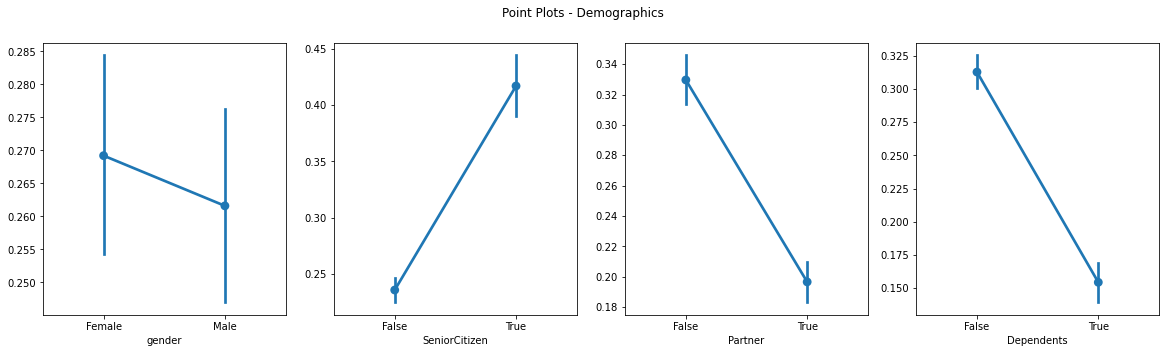

In [16]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
i = 0
for col in demographics:
    sns.pointplot(ax=ax[i], x=col, y=np.where(df['Churn']=='No', 0, 1), data=df)
    i += 1

plt.suptitle('Point Plots - Demographics')
plt.show()

### Service Options

In [17]:
service = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
   'TechSupport', 'StreamingTV', 'StreamingMovies']
df[service + ['Churn']].head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,False,No phone service,DSL,No Online Security,Online Backup,No Device Protection,No Tech Support,Not Streaming TV,Not Streaming Movies,No
1,True,Single Line,DSL,Online Security,No Online Backup,Device Protection,No Tech Support,Not Streaming TV,Not Streaming Movies,No
2,True,Single Line,DSL,Online Security,Online Backup,No Device Protection,No Tech Support,Not Streaming TV,Not Streaming Movies,Yes
3,False,No phone service,DSL,Online Security,No Online Backup,Device Protection,Tech Support,Not Streaming TV,Not Streaming Movies,No
4,True,Single Line,Fiber optic,No Online Security,No Online Backup,No Device Protection,No Tech Support,Not Streaming TV,Not Streaming Movies,Yes


In [18]:
# define contingency table and calculate % churn
def ct(df, column):
    ct = pd.crosstab(df[column], df['Churn'])
    ct['Churn %'] = round(100*ct['Yes']/(ct['No']+ct['Yes']), 2)
    return ct

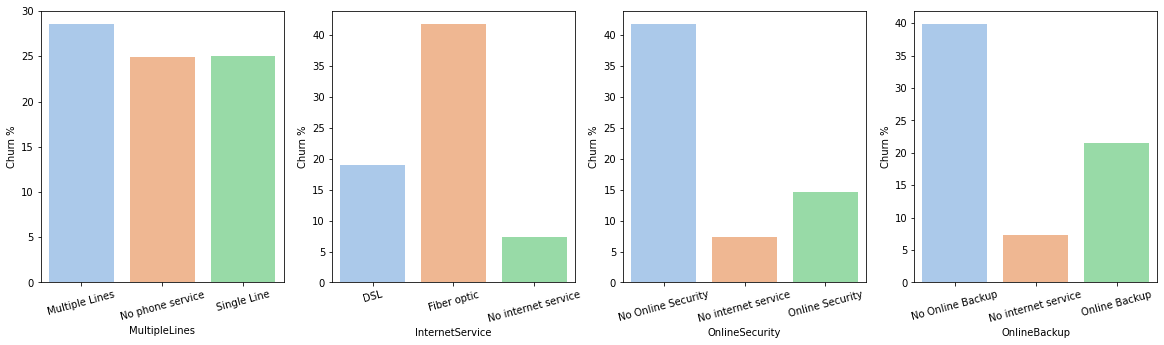

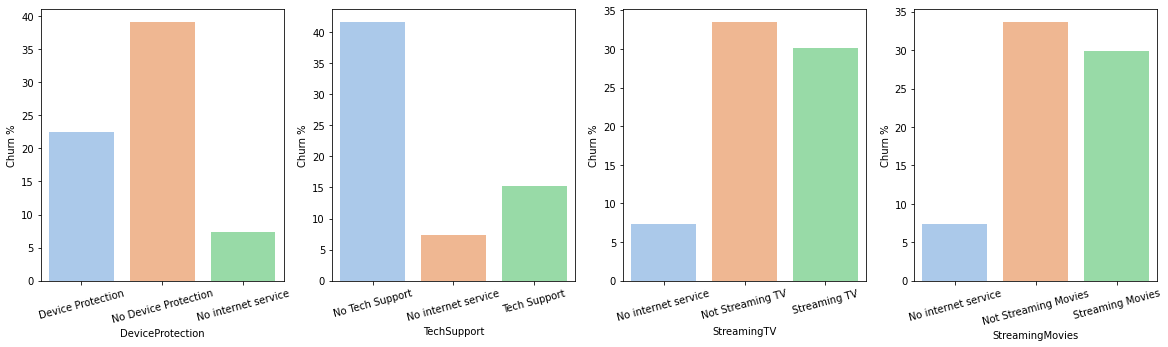

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
i = 0
for col in service[1:5]:
    sns.barplot(ax=ax[i], x=col, y='Churn %', data=ct(df, col).reset_index(), palette='pastel')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=15)
    i +=1
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
i = 0
for col in service[5:]:
    sns.barplot(ax=ax[i], x=col, y='Churn %', data=ct(df, col).reset_index(), palette='pastel')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=15)
    i +=1
plt.show()

In [20]:
ct_stratified = pd.crosstab(index=[df['TechSupport'], df['InternetService']], columns=df['Churn'])
ct_stratified['Churn %'] = round(100*ct_stratified['Yes']/(ct_stratified['No']+ct_stratified['Yes']), 2)
ct_stratified

Churn                                      No   Yes  Churn %
TechSupport         InternetService                         
No Tech Support     DSL                   898   345    27.76
                    Fiber optic          1129  1101    49.37
No internet service No internet service  1413   113     7.40
Tech Support        DSL                  1064   114     9.68
                    Fiber optic           670   196    22.63

In [21]:
ct_stratified = pd.crosstab(index=[df['StreamingTV'], df['StreamingMovies']], columns=df['Churn'])
ct_stratified['Churn %'] = round(100*ct_stratified['Yes']/(ct_stratified['No']+ct_stratified['Yes']), 2)
ct_stratified

Churn                                       No  Yes  Churn %
StreamingTV         StreamingMovies                         
No internet service No internet service   1413  113     7.40
Not Streaming TV    Not Streaming Movies  1323  695    34.44
                    Streaming Movies       545  247    31.19
Streaming TV        Not Streaming Movies   524  243    31.68
                    Streaming Movies      1369  571    29.43

In [22]:
ct_stratified = pd.crosstab(index=[df['OnlineSecurity'], df['OnlineBackup']], columns=df['Churn'])
ct_stratified['Churn %'] = round(100*ct_stratified['Yes']/(ct_stratified['No']+ct_stratified['Yes']), 2)
ct_stratified

Churn                                      No   Yes  Churn %
OnlineSecurity      OnlineBackup                            
No Online Security  No Online Backup     1138  1057    48.15
                    Online Backup         899   404    31.01
No internet service No internet service  1413   113     7.40
Online Security     No Online Backup      717   176    19.71
                    Online Backup        1007   119    10.57

### Account Features

In [23]:
account = ['Contract', 'PaperlessBilling', 'PaymentMethod']
df[account + ['Churn']].head()

,Contract,PaperlessBilling,PaymentMethod,Churn
0,Month-to-month,True,Electronic check,No
1,One year,False,Mailed check,No
2,Month-to-month,True,Mailed check,Yes
3,One year,False,Bank transfer (automatic),No
4,Month-to-month,True,Electronic check,Yes


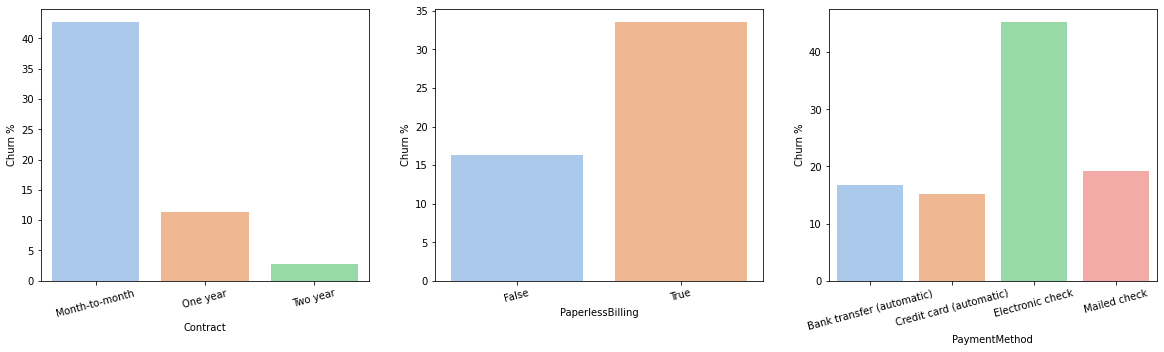

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

i = 0
for col in account:
    sns.barplot(ax=ax[i], x=col, y='Churn %', data=ct(df, col).reset_index(), palette='pastel')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=15)
    i += 1

In [25]:
ct_stratified = pd.crosstab(index=[df['PaperlessBilling'], df['PaymentMethod']], columns=df['Churn'])
ct_stratified['Churn %'] = round(100*ct_stratified['Yes']/(ct_stratified['No']+ct_stratified['Yes']), 2)
ct_stratified

Churn                                        No  Yes  Churn %
PaperlessBilling PaymentMethod                               
False            Bank transfer (automatic)  581   72    11.03
                 Credit card (automatic)    576   64    10.00
                 Electronic check           419  204    32.74
                 Mailed check               827  129    13.49
True             Bank transfer (automatic)  705  186    20.88
                 Credit card (automatic)    714  168    19.05
                 Electronic check           875  867    49.77
                 Mailed check               477  179    27.29

In [26]:
ct_stratified = pd.crosstab(index=[df['Contract'], df['PaymentMethod']], columns=df['Churn'])
ct_stratified['Churn %'] = round(100*ct_stratified['Yes']/(ct_stratified['No']+ct_stratified['Yes']), 2)
ct_stratified

Churn                                      No  Yes  Churn %
Contract       PaymentMethod                               
Month-to-month Bank transfer (automatic)  388  201    34.13
               Credit card (automatic)    365  178    32.78
               Electronic check           856  994    53.73
               Mailed check               611  282    31.58
One year       Bank transfer (automatic)  353   38     9.72
               Credit card (automatic)    357   41    10.30
               Electronic check           283   64    18.44
               Mailed check               314   23     6.82
Two year       Bank transfer (automatic)  545   19     3.37
               Credit card (automatic)    568   13     2.24
               Electronic check           155   13     7.74
               Mailed check               379    3     0.79

## Dealing with the Imbalanced Target Variable

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# combining random over sampling and random under sampling to fix imbalanced target variable
X_df = df.drop('Churn', axis=1).copy()
y_df = df['Churn'].values

ros = RandomOverSampler(sampling_strategy=0.6)
X_ros, y_ros = ros.fit_resample(X_df, y_df)
print(Counter(y_ros))

rus = RandomUnderSampler(sampling_strategy=0.8)
X_co, y_co = rus.fit_resample(X_ros, y_ros)
print(Counter(y_co))

sampling_df = X_co.copy()
sampling_df['Churn'] = y_co

Counter({'No': 5174, 'Yes': 3104})
Counter({'No': 3880, 'Yes': 3104})


## Data Cleaning

In [28]:
from sklearn import preprocessing

In [29]:
X_df = sampling_df.iloc[:, 1:-1].copy()
y = sampling_df.iloc[:, -1].values

# encoding binary categorical variables:
binary_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
              'PhoneService', 'PaperlessBilling']

for col in binary_col:
    le = preprocessing.LabelEncoder()
    X_df[col] = le.fit_transform(X_df[col])

# one-hot-encoding for the remaining categorical variables:
remaining_col = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

X_df = pd.get_dummies(X_df, columns=remaining_col, drop_first=True)
X = X_df.values

# class encoding:
le_class = preprocessing.LabelEncoder()
y = le_class.fit_transform(y)

## Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 60/40 train/test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 20/20 test/validation split:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# scale features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_val_std = stdsc.transform(X_val)

X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_df.columns

In [32]:
X_train_std.to_csv('X_train.csv', index=False)
pd.DataFrame(X_test_std).to_csv('X_test.csv', index=False)
pd.DataFrame(X_val_std).to_csv('X_val.csv', index=False)

pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)
pd.DataFrame(y_val).to_csv('y_val.csv', index=False)